## 타이타닉 튜토리얼 - Exploratory Data Analysis, Visualization, Machine Learning 

출처: https://kaggle-kr.tistory.com/17?category=868316

### Contents

1. 데이터셋 확인
 - Null Data Check
 - Target Label 확인
 
<br/>2. EDA
 - 2.1 Pclass
 - 2.2 Sex
 - 2.3 Both Sex and Pclass
 - 2.4 Age
 - 2.5 Pclass, Sex, Age
 - 2.6 Embarked
 - 2.7 Family - SibSp + Parch (형제자매 및 배우자 + 부모자녀)
 - 2.8 Cabin
 
<br/>3. Feature Engineering
 - 3.1 Fill Null Data
       * 3.1.1 Fill Null in Age using title
       * 3.1.2 Fill Null in Embarked
 - 3.2 Change Age (Continuous to Categorical)
 - 3.3 Change Initial, Embarked and Sex(String to Numerical)
 - 3.4 One-hot Encoding on Initial and Embarked
 - 3.5 Drop Columns

<br/>4. Building ML Model and Prediction
 - 4.1 Preparation - Split dataset into train, valid, and test set
 - 4.2 Model Generation and prediction
 - 4.3 Feature Importance
 
<br/>5. Conclusion

* 목표: 타이타닉 생존자, 사망자들의 데이터를 활용하여, 승선자들의 생존여부를 예측

## 라이브러리 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family = 'AppleGothic')
mpl.rc('axes', unicode_minus = False)

plt.style.use('seaborn')
sns.set(font_scale = 1.0)

import missingno as msno # 결측치 확인용 라이브러리

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. 데이터셋 확인

In [2]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


위의 데이터에서 PassengerId는 단순히 개별승객을 나타내는 Id로 분석에 쓰이지는 않음

|변수|정의|설명|타입|
|:---:|:---:|:---:|:---:|
|Survived|생존여부|예측대상으로 1, 0으로 표현됨|Int|
|Pclass|좌석등급|1 = 1st, 2 = 2nd, 3 = 3rd 로 Categorical Feature|Int|
|Name|이름|탑승객의 이름|String|
|Sex|성별|male, female로 Binary Feature|String|
|Age|연령|Continuous Feature|Float|
|SibSp|동승한 형제자매 및 배우자|quantitive|Int|
|Parch|동승한 부모 및 자녀|quantitive|Int|
|Ticket|티켓번호|알파벳과 숫자의 조합|String|
|Cabin|객실번호|알파벳과 숫자의 조합|String|
|Embarked|탑승항구|C, S, Q 세가지 항구|String|

판다스에서는 describe() 메소드가 있는데, 이를 통해 각 feature가 가지고 있는 통계값들을 확인할 수 있습니다.

In [4]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Torber, Mr. Ernst William",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Douglas, Mrs. Walter Donald (Mahala Dutton)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


위의 결과에서 확인해볼 수 있듯이, train과 test에 PassengerID가 891명, 418명의 승객이 존재하지만 일부 피처들에는 결측치가 존재합니다.(Age, Cabin 등)

이 결측치들을 보기 편하도록 시각화해서 살펴보겠습니다.

### 1.1 Null Data Check

In [6]:
for col in df_train.columns:
    msg = "column: {:>11}\t Percent of NaN value: {:.2f}%".format(col, 100*df_train[col].isnull().sum()/df_train.shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:    Survived	 Percent of NaN value: 0.00%
column:      Pclass	 Percent of NaN value: 0.00%
column:        Name	 Percent of NaN value: 0.00%
column:         Sex	 Percent of NaN value: 0.00%
column:         Age	 Percent of NaN value: 19.87%
column:       SibSp	 Percent of NaN value: 0.00%
column:       Parch	 Percent of NaN value: 0.00%
column:      Ticket	 Percent of NaN value: 0.00%
column:        Fare	 Percent of NaN value: 0.00%
column:       Cabin	 Percent of NaN value: 77.10%
column:    Embarked	 Percent of NaN value: 0.22%


In [7]:
for col in df_test.columns:
    msg = "column: {:>11}\t Percent of NaN value: {:.2f}%".format(col, 100*df_test[col].isnull().sum()/df_test.shape[0])
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:      Pclass	 Percent of NaN value: 0.00%
column:        Name	 Percent of NaN value: 0.00%
column:         Sex	 Percent of NaN value: 0.00%
column:         Age	 Percent of NaN value: 20.57%
column:       SibSp	 Percent of NaN value: 0.00%
column:       Parch	 Percent of NaN value: 0.00%
column:      Ticket	 Percent of NaN value: 0.00%
column:        Fare	 Percent of NaN value: 0.24%
column:       Cabin	 Percent of NaN value: 78.23%
column:    Embarked	 Percent of NaN value: 0.00%


train과 test 데이터에서 둘 다 Age는 약 20%, Cabin은 77~78%정도의 Null 데이터를 가지고 있습니다.

missingno 라이브러리를 사용하면 null 데이터를 쉽게 시각화할 수 있습니다.

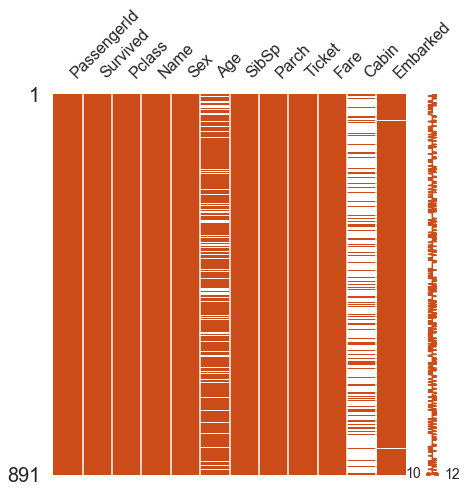

In [8]:
msno.matrix(df = df_train.iloc[:,:], figsize=(7,7), color = (0.8, 0.3, 0.1))

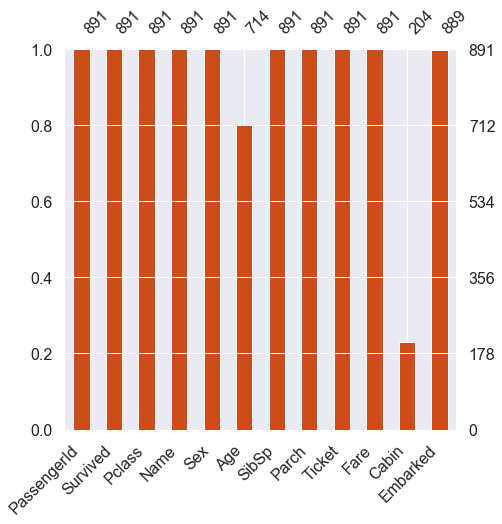

In [9]:
msno.bar(df = df_train.iloc[:,:], figsize=(7,7), color= (0.8, 0.3, 0.1))

### 1.2 Target Label 확인

* Target Label인 Survived가 어떤 분포를 가지고 있는지 확인합니다.
* Titanic 경진대회와 같은 binary classification 문제는 1과 0의 분포가 어떠하냐에 따라 모델 평가 방법이 달라집니다.

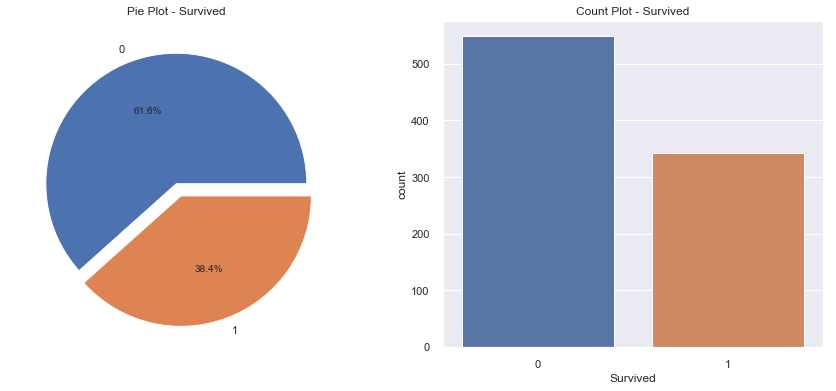

In [10]:
f, ax = plt.subplots(1, 2, figsize = (15, 6))
df_train['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=False)
ax[0].set_title('Pie Plot - Survived')
ax[0].set_ylabel('')

sns.countplot(data=df_train, x='Survived', ax=ax[1])
ax[1].set_title('Count Plot - Survived')

plt.show()

* 사망한 사람은 train 데이터의 61.6%, 생존한 사람은 38.4%를 차지하고 있습니다.
* target label의 분포가 비교적 균일한 편입니다.<br/>가령 전체 중 99%가 1이라고 한다면, 단순히 모든 데이터를 1으로 예측하는 모델만 만들어도 정확도가 99%입니다.<br/>0을 찾아야하는 문제일 경우 그런 모델은 원하는 결과를 줄 수 없습니다. 하지만 이 경우에는 그렇지 않기 때문에 계속 진행합니다.

## 2. EDA

### 2.1 Pclass

Pclass는 categorical feature로 1, 2, 3의 각 값들은 좌석등급을 나타냅니다.<br/>
Pclass가 어떤 분포를 가지고 있는지, 그리고 각 값에 따른 생존률이 어떻게 되는지 확인해보겠습니다.

In [11]:
df_train.groupby(['Pclass'], as_index=True)['Survived'].count().to_frame()

,Survived
Pclass,
1,216
2,184
3,491


In [12]:
df_train.groupby(['Pclass'], as_index=True)['Survived'].sum().to_frame()

,Survived
Pclass,
1,136
2,87
3,119


위와 같은 데이터를 판다스의 crosstab을 이용하면 더 쉽게 시각화할 수 있습니다.

In [13]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient('summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


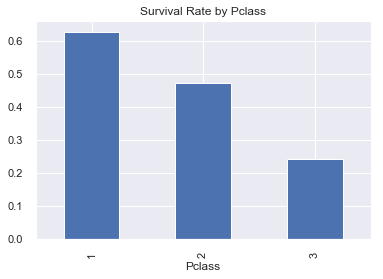

In [14]:
df_train.groupby(['Pclass'])['Survived'].mean().plot.bar().set_title('Survival Rate by Pclass')
plt.show()

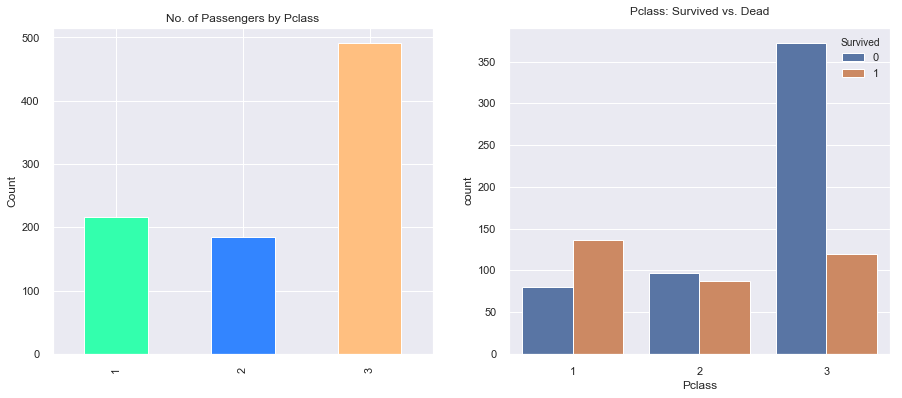

In [15]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(15, 6))

df_train['Pclass'].value_counts().sort_index().plot.bar(color=['#33ffad', '#3385ff', '#ffbf80'], ax=ax[0])
ax[0].set_title('No. of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot(data=df_train, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead', y=y_position)
plt.show()

위의 결과를 보면 Pclass가 높을수록, 생존률이 높음을 확인할 수 있습니다.<br/>
때문에 Pclass가 생존 여부와 연관이 있음을 생각할 수 있고, 모델을 만들 때 이 feature를 사용하는 것이 좋다고 판단할 수 있습니다.

### 2.2 Sex

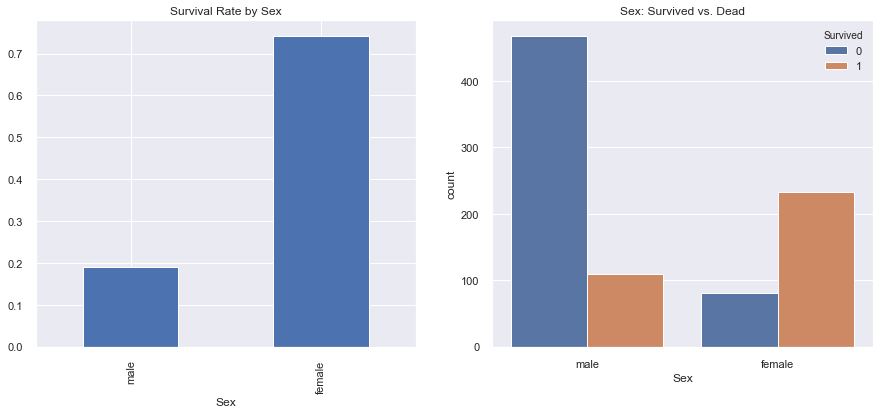

In [16]:
f, ax = plt.subplots(1, 2, figsize=(15,6))
df_train.groupby(['Sex'], as_index = True)['Survived'].mean().sort_values().plot.bar(ax=ax[0])
ax[0].set_title('Survival Rate by Sex')

sns.countplot(data=df_train, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')

plt.show()

위의 그래프를 보면 여성의 경우 생존 확률이 훨씬 높다는 것을 알 수 있습니다.

In [17]:
df_train.groupby(['Sex'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 featured임을 알 수 있습니다.

### 2.3 Both Sex and Pclass

* 이번에는 Sex와 Pclass 두 가지를 동시에 고려하여 생존률이 어떻게 달라지는지 보겠습니다.

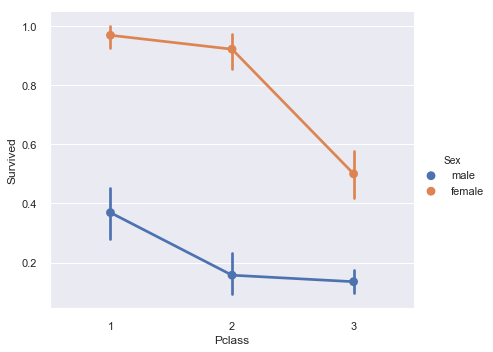

In [19]:
sns.factorplot(data=df_train, x='Pclass', y='Survived', hue='Sex', size=5, aspect=1.2) # size : 전체적인 사이즈, aspect : 세로 대비 가로의 비율
plt.show()

* 모든 클래스에서 여성의 생존률이 더 높게 나타납니다.
* 또한 성별에 관계없이 Pclass가 높을수록 생존률이 높습니다.

factorplot에서 hue를 column으로 변경하면 아래와 같이 그래프가 나타납니다.

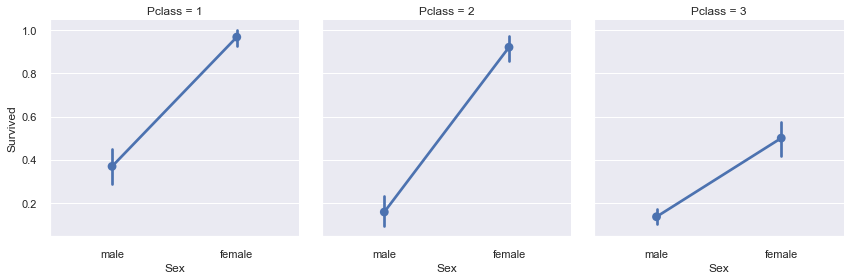

In [20]:
sns.factorplot(data=df_train, x='Sex', y='Survived', col = 'Pclass', size=4, aspect =1)
plt.show()

### 2.4 Age

In [21]:
print("제일 나이 많은 탑승객: {:.1f} Years".format(df_train['Age'].max()))
print("제일 나이 어린 탑승객: {:.1f} Years".format(df_train['Age'].min()))
print("탑승객 평균 나이: {:.1f} Years".format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 나이 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


생존에 따른 Age의 분포를 살펴보겠습니다.

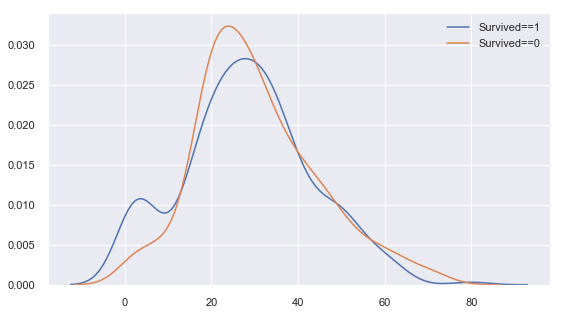

In [22]:
f, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

생존자의 경우 나이가 어린 경우가 더 많음을 확인할 수 있습니다.

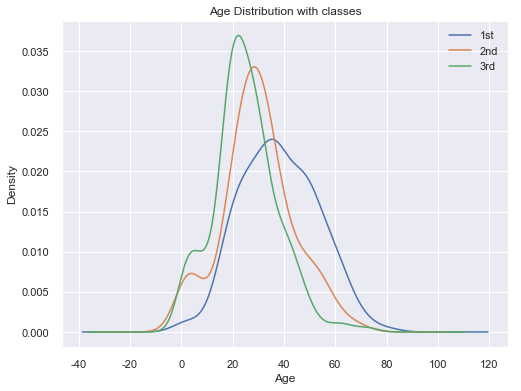

In [23]:
# Age Distribution with classes
plt.figure(figsize=(8, 6))
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')
plt.xlabel('Age')
plt.title('Age Distribution with classes')
plt.legend(['1st', '2nd', '3rd'])

Class가 높을수록 고연령층의 비중이 높아집니다.

이번에는 연령에 따라 생존률이 어떻게 변하는지 확인해보겠습니다.

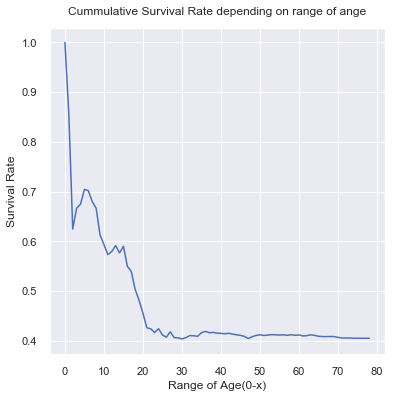

In [24]:
cummulative_survivial_ratio = []

for i in range(1, 80):
    cummulative_survivial_ratio.append(df_train[df_train['Age']<i]['Survived'].sum()/len(df_train[df_train['Age']< i]['Survived']))

plt.figure(figsize=(6, 6))
plt.plot(cummulative_survivial_ratio)
plt.title('Cummulative Survival Rate depending on range of ange', y=1.02)
plt.ylabel('Survival Rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

위의 그래프에서 볼 수 있듯이 나이가 어릴 때 생존률이 높습니다.<br/>
때문에 나이가 생존과 관련하여 중요한 feature로 쓰일 수 있음을 확인했습니다.

### 2.5 Pclass, Sex, Age

지금까지 살펴본 Pclass, Sex, Age, Survived를 모두에 대해 그려보려고 합니다. 이를 쉽게 해주는 것이 violin plot입니다.

x축은 우리가 보고 싶어하는 case(Pclass, Sex)를, y축은 보고 싶어하는 distribution(Age)을 살펴보겠습니다.

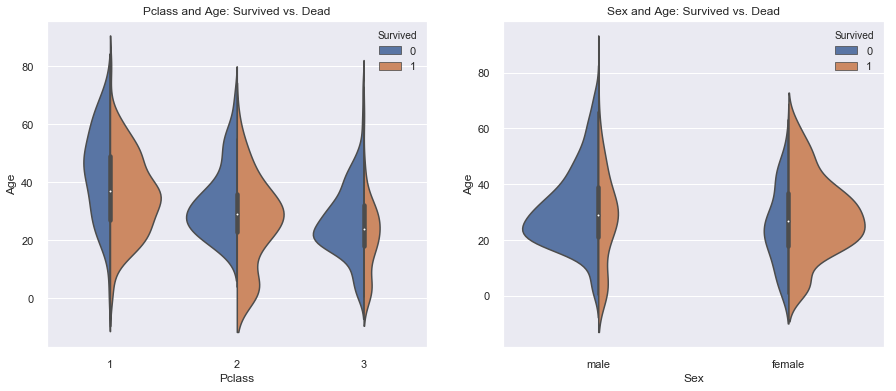

In [25]:
f, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.violinplot(data=df_train, x='Pclass', y='Age', hue='Survived', split=True, scale='count', ax=ax[0])
ax[0].set_title('Pclass and Age: Survived vs. Dead')
ax[0].set_yticks(range(0,100,20))
sns.violinplot(data=df_train, x='Sex', y='Age', hue='Survived', split=True, scale='count', ax=ax[1])
ax[1].set_title('Sex and Age: Survived vs. Dead')
ax[1].set_yticks(range(0,100,20))
plt.show()

* 왼쪽그림은 Pclass별, 생존여부별로 Age의 분포가 어떻게 나타나는지 보여주고 있습니다.
* 오른쪽의 경우 성별, 생존여부별로 Age의 분포를 보여주고 있습니다.
* 생존을 봤을 때, 모든 Pclass에서 연령이 어릴수록 분포가 두꺼워 생존자들이 많이 있음을 알 수 있습니다.
* Pclass별로 보면 좌석 등급이 높을수록 생존자가 많은 것을, 성별로는 여성이 생존자가 많은 것을 알 수 있습니다.
* 결국 여성과 아이, 그리고 높은 등급의 생존자들을 우선해서 구조한 것으로 예상됩니다.

### 2.6 Embarked

* Embarked는 탑승한 항구로 이에 따른 생존률을 살펴보겠습니다.

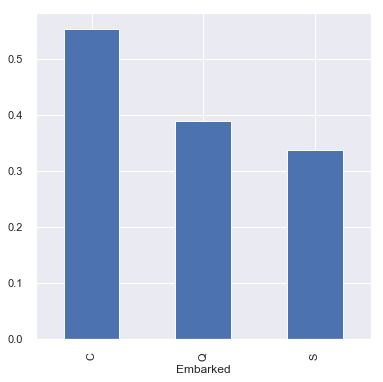

In [26]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
df_train.groupby(['Embarked'], as_index=True)['Survived'].mean().sort_values(ascending=False).plot.bar(ax=ax)

탑승항구마다 생존률의 차이가 나타나고 있습니다. C에서 탑승한 경우의 생존률이 0.5 이상으로 가장 높은 편입니다. 

만들 모델에서도 Embarked를 고려해볼 수 있습니다.

Embarked를 다른 feature들과 함께 살펴보겠습니다.

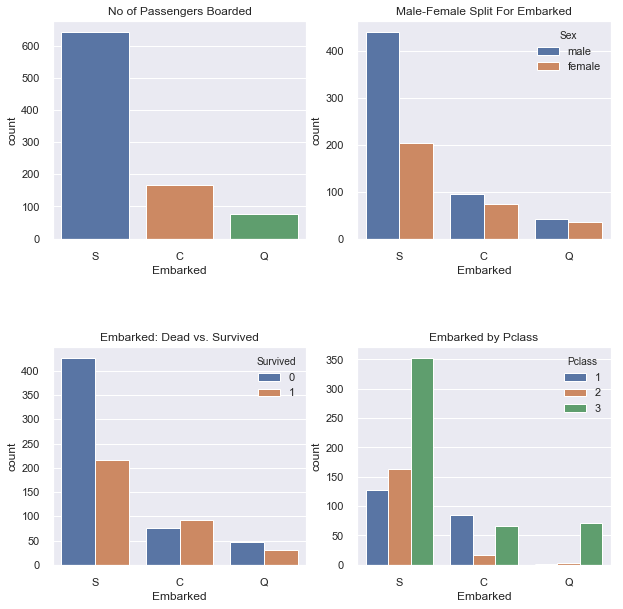

In [27]:
f, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.countplot(data=df_train, x='Embarked', ax=ax[0, 0])
ax[0,0].set_title('No of Passengers Boarded')

sns.countplot(data=df_train, x='Embarked', hue='Sex', ax=ax[0,1])
ax[0,1].set_title('Male-Female Split For Embarked')

sns.countplot(data=df_train, x='Embarked', hue='Survived', ax=ax[1,0])
ax[1,0].set_title('Embarked: Dead vs. Survived')

sns.countplot(data=df_train, x='Embarked', hue='Pclass', ax=ax[1,1])
ax[1,1].set_title('Embarked by Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 전체적으로 봤을 때 S에서 가장 많은 사람이 탑승했습니다.
* C와 Q에 비해 S는 남성 탑승객의 비중이 높습니다.
* 생존자의 비율은 C가 가장 높습니다.
* 이는 C가 여성 탑승각과 1st 등급 탑승객이 많아서 그런것으로 생각됩니다.

### 2.7 Family = SibSp + Parch

SibSp와 Parch를 합치면 본인을 제외한 총 가족수가 될 것이기에 이를 합쳐서 분석해보겠습니다.

In [28]:
# 자신을 포함해야하니 1을 더합니다.
df_train['FamilySize'] = df_train['SibSp']+df_train['Parch'] + 1 
df_test['FamilySize'] = df_test['SibSp']+df_test['Parch'] + 1 

In [29]:
print("Maximum Size of Family : ", df_train['FamilySize'].max())
print("Minimum Size of Family : ", df_train['FamilySize'].min())

Maximum Size of Family :  11
Minimum Size of Family :  1


FamilySize와 생존여부와의 관계를 살펴보겠습니다.

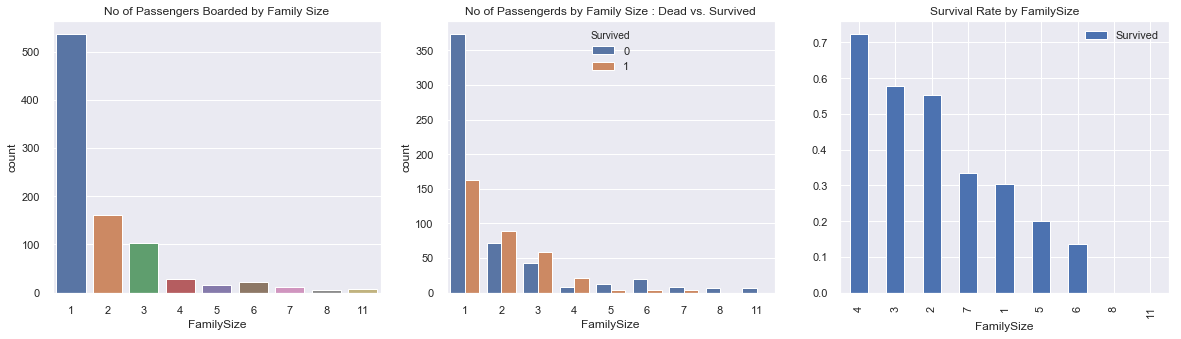

In [30]:
f, ax = plt.subplots(1, 3, figsize=(20, 5))

sns.countplot(data=df_train, x='FamilySize', ax=ax[0])
ax[0].set_title('No of Passengers Boarded by Family Size')

sns.countplot(data=df_train, x='FamilySize', hue='Survived', ax=ax[1])
ax[1].set_title('No of Passengerds by Family Size : Dead vs. Survived')

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot(kind='bar', ax=ax[2])
ax[2].set_title('Survival Rate by FamilySize')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

* 혼자 탑승한 경우가 대부분이며 그 다음이 2, 3, 4명 가족 순으로 탑승객이 많습니다.
* 가족수가 2~4명일때의 생존률이 상대적으로 높습니다. 그리고 혼자 탑승할 때의 생존률도 낮은데, 가족의 규모가 커지면 혼자 탑승한 경우보다 생존률이 낮게 나타납니다.

### 2.8 Fare

Fare는 탑승요금으로 continuous feature 입니다.

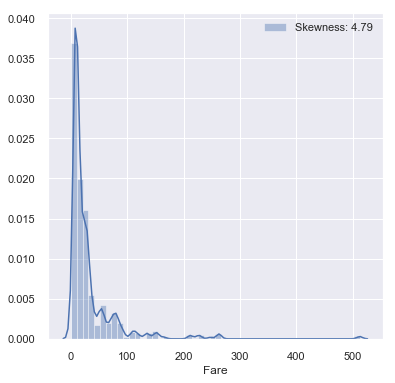

In [31]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.distplot(df_train['Fare'], color='b', label = 'Skewness: {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
plt.legend(loc='best')
plt.show()

* Fare의 distribution은 매우 비대칭적인 상태입니다.(Highly Skewed)<br/>
이대로 모델에 넣으면 모델이 잘못 학습될 수 있습니다.<br/>
몇개 없는 outlier에 너무 민감하게 반응하면 실제 예측시에 좋지 못한 결과를 부를 수 있습니다.

* 때문에 outlier의 영향을 줄이기 위해 Fare에 log를 취하겠습니다.
* 여기서 pandas의 유용한 기능, apply를 적용하겠습니다.

In [32]:
# test 셋이 존재하는 Fare 결측치 채워주기
df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()

In [33]:
df_train['Fare'] = df_train['Fare'].map(lambda x : np.log(x) if x > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda x : np.log(x) if x > 0 else 0 )

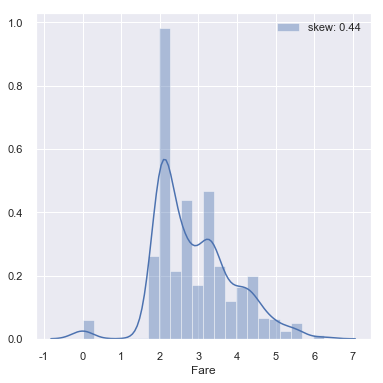

In [34]:
f, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.distplot(df_train['Fare'], color='b', label='skew: {:.2f}'.format(df_train['Fare'].skew(), ax=ax))
plt.legend(loc='best')

* log를 취하니 비대칭성이 많이 사라졌습니다.
* 이런 작업을 사용해 모델이 보다 나은 성능을 내도록 할 수 있습니다.
* 이러한 작업은 feature engineering에 주로 들어가는 부분인데 미리 작업했습니다.
* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature들에 여러 조작을 가하거나 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데 이제 그것을 살펴볼 것입니다.

### 2.9 Cabin

* 이 feature의 경우 NaN이 대략 80% 정도 이므로 생존에 영향을 미치는 중요한 정보를 얻어내기 쉽지 않습니다.
* 그러므로 이번 모델에서는 포함하지 않겠습니다.

In [35]:
df_train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

### 2.10 Ticket

* 이 feature에는 NaN이 없습니다. 일단 string data이므로 우리가 어떤 작업을 위해서는 별도의 아이디어가 필요합니다.
* 이번 튜토리얼에는 우선 넘어가겠습니다.

In [36]:
df_train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

## 3. Feature Engineering

* 본격적으로 feature engireering을 하겠습니다.
* 가장 먼저, 데이터셋에 존재하는 null 값들을 채우려고 합니다.
* 아무 숫자로 채울 수는 없고, null data를 포함하는 feature의 statistics를 참고하거나, 다른 아이디어를 통해 채울 수 있습니다.
* 어떻게 이 null data를 채우느냐에 따라 모델의 성능이 바뀌기 때문에 중요합니다.
* Feature Engineering은 실제 모델 학습에 쓰려고 하는 것이기 때문에, train 뿐만 아니라 test도 똑같이 적용해야 합니다.

### 3.1 Fill Null

#### 3.1.1 Fill Null in Age using title 

* Age에는 Null data가 177개나 있습니다. 이를 채울 수 있는 여러 방법이 있지만 여기서는 title과 통계값을 활용해보겠습니다.
* 영어에는 Miss, Mrs, Mr 같은 title이 있습니다. 탑승객의 이름에 들어가는 title을 Age 데이터를 채우는데 사용하겠습니다.
* 판다스 series에는 데이터를 string으로 바꿔주는 str 메소드, 정규표현식을 적용하게 해주는 extract method가 있습니다. 이를 사용하여 title을 쉽게 추출할 수 있습니다. title을 Initial 컬럼에 저장하겠습니다.

In [37]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

* 판다스의 crosstab을 사용하여 Initial과 Sex간의 count를 살펴보겠습니다.

In [38]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


* title이 성별에 따라 붙는 경향이 있음을 확인할 수 있습니다. 그리고 수가 얼마되지 않는 title을 몇개의 경우로 통일하도록 합니다.

In [39]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],
                            inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],
                            inplace=True)

In [40]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


* 여성과 관련이 있는 Miss, Mrs와 어린아이를 나타내는 Master의 경우 상애적으로 생존률이 높은 것을 볼 수 있습니다.

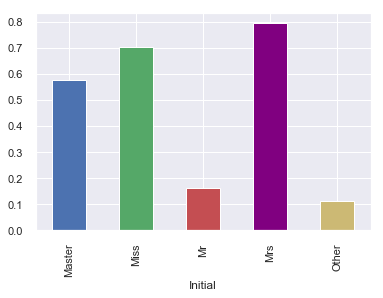

In [41]:
df_train.groupby(['Initial'])['Survived'].mean().plot.bar(color=['b','g','r','purple','y'])

* 이제 본격적으로 Null을 채울 차례 입니다. null을 채울 것입니다. null data를 채우는 방법은 많이 존재합니다. 통계값을 활용하는 방법도 있고, null data 이 없는 데이터를 기반으로 새로운 머신러닝 알고리즘을 만들어 예측해서 채워넣는 방식도 있습니다. 이번에는 통계값을 활용하는 방법을 사용할 것입니다.

* 여기서 통계값은 train의 것을 의미합니다. 우리는 언제나 train에서 얻은 데이터를 기반으로 test의 null 데이터를 채워줘야 합니다.

In [42]:
df_train.groupby(['Initial']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


* 판다스의 데이터프레임을 다룰 때는 boolean array를 이용해 indexing하는 방식이 편리합니다.
* loc + boolean + column을 사용해 값을 치환하는 방법은 자주 사용됩니다.

In [43]:
df_train.loc[( (df_train['Age']).isnull() ) & ( df_train['Initial']=='Mr'), 'Age'] = 33
df_train.loc[( (df_train['Age']).isnull() ) & ( df_train['Initial']=='Mrs'), 'Age'] = 36
df_train.loc[( (df_train['Age']).isnull() ) & ( df_train['Initial']=='Master'), 'Age'] = 5
df_train.loc[( (df_train['Age']).isnull() ) & ( df_train['Initial']=='Miss'), 'Age'] = 22
df_train.loc[( (df_train['Age']).isnull() ) & ( df_train['Initial']=='Other'), 'Age'] = 46

df_test.loc[( (df_test['Age']).isnull() ) & ( df_test['Initial']=='Mr'), 'Age'] = 33
df_test.loc[( (df_test['Age']).isnull() ) & ( df_test['Initial']=='Mrs'), 'Age'] = 36
df_test.loc[( (df_test['Age']).isnull() ) & ( df_test['Initial']=='Master'), 'Age'] = 5
df_test.loc[( (df_test['Age']).isnull() ) & ( df_test['Initial']=='Miss'), 'Age'] = 22
df_test.loc[( (df_test['Age']).isnull() ) & ( df_test['Initial']=='Other'), 'Age'] = 46

#### 3.1.2 Fill Null in Embarked

In [44]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), 'Null values')

Embarked has  2 Null values


* Embarked는 Null value가 2개이고, S에서 가장 많은 탑승객이 있었으므로 간단하게 Null을 S로 채우겠습니다.

* dataframe의 fillna method를 이용하면 쉽게 채울 수 있습니다. 여기서 inplace = True로 하면 df_train에 fillna를 실제로 적용하게 됩니다.

In [45]:
df_train['Embarked'].fillna('S', inplace = True)

### 3.2 Change Age(Continuous to Categorical)

* Age는 현재 continuous feature입니다. 이대로 모델을 세울 수 있지만, Age를 몇개의 group으로 나누어 category화 시켜줄 수 있습니다. continuous를 categorical로 바꾸면 자칫 information loss가 생길수도 있습니다. 하지만 이번에는 categorical로 변경하겠습니다.

* 방법은 여러가지가 있습니다. 데이터프레임의 indexing방법인 loc를 사용해서 직접해줄 수 있고, 아니면 apply함수를 사용해 함수를 넣어줄 수 있습니다.

* 첫번째는 loc를 사용한 방법입니다. loc는 자주 쓰게 되므로 사용법을 숙지하면 좋습니다.
* 나이는 10살 간격으로 나누겠습니다.

In [46]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[ ( df_train['Age'] >= 10 ) & ( df_train['Age'] < 20 ), 'Age_cat'] = 1
df_train.loc[ ( df_train['Age'] >= 20 ) & ( df_train['Age'] < 30 ), 'Age_cat'] = 2
df_train.loc[ ( df_train['Age'] >= 30 ) & ( df_train['Age'] < 40 ), 'Age_cat'] = 3
df_train.loc[ ( df_train['Age'] >= 40 ) & ( df_train['Age'] < 50 ), 'Age_cat'] = 4
df_train.loc[ ( df_train['Age'] >= 50 ) & ( df_train['Age'] < 60 ), 'Age_cat'] = 5
df_train.loc[ ( df_train['Age'] >= 60 ) & ( df_train['Age'] < 70 ), 'Age_cat'] = 6
df_train.loc[ ( df_train['Age'] >= 70 ), 'Age_cat'] = 7


df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[ ( df_test['Age'] >= 10 ) & ( df_test['Age'] < 20 ), 'Age_cat'] = 1
df_test.loc[ ( df_test['Age'] >= 20 ) & ( df_test['Age'] < 30 ), 'Age_cat'] = 2
df_test.loc[ ( df_test['Age'] >= 30 ) & ( df_test['Age'] < 40 ), 'Age_cat'] = 3
df_test.loc[ ( df_test['Age'] >= 40 ) & ( df_test['Age'] < 50 ), 'Age_cat'] = 4
df_test.loc[ ( df_test['Age'] >= 50 ) & ( df_test['Age'] < 60 ), 'Age_cat'] = 5
df_test.loc[ ( df_test['Age'] >= 60 ) & ( df_test['Age'] < 70 ), 'Age_cat'] = 6
df_test.loc[ ( df_test['Age'] >= 70 ), 'Age_cat'] = 7

* 두번째로 간단한 함수를 만들어 apply 메소드를 넣어주는 방법입니다. 

In [47]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 : 
        return 4
    elif x < 60 :
        return 5
    elif x < 70 : 
        return 6
    else :
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

* 두 가지 방법이 잘 적용됐다면, 둘 다 같은 결과를 내야합니다.
* 이를 확인하기 위해 Series간 boolean 비교 후 all() 메소드를 사용해서 확인할 수 있습니다. all() 메소드는 모든 값이 True면 True, 하나라도 False가 있으면 False 를 줍니다.

In [48]:
print('1번 방법, 2번 방법 둘 다 같은 결과를 내면 True를 줘야 함 ->',
      (df_train['Age_cat'] == df_train['Age_cat_2']).all())

1번 방법, 2번 방법 둘 다 같은 결과를 내면 True를 줘야 함 -> True


### 3.3 Change Initial, Embarked, and Sex (String to numerical)

* 현재 Initial은 Mr, Mrs, Master, Miss, Other 총 5개로 이루어져있습니다. 이런 카테고리로 표현되어있는 데이터를 모델에 인풋으로 넣어줄 떄 우리가 해야할 것은 컴퓨터가 인식할 수 있도록 수치화 시켜줘야합니다.

* map method를 가지고 간단히 변경할 수 있습니다.
* 사전 순서대로 정리하며 mapping 하겠습니다.

In [49]:
df_train['Initial'] = df_train['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Other': 4})

* Embarked도 C, Q, S로 이루어져 있습니다. map을 이용해 바꿔봅시다.
* 그러기에 앞서서 특정 컬럼에 어떤 값들이 있는지 확인하는 방법을 잠깐 살펴보겠습니다. 간단히 unique() 메소드를 쓰거나 value_counts()를 써서 count까지 보는 방법이 있습니다.

In [50]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

* 위 두 방법을 사용해 Embarked가 S, C, Q 세 가지로 이루어진 것을 볼 수 있습니다. 이제 map을 사용해서 바꿔보겠습니다.

In [52]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

* Null이 사라졌는지 확인해보겠습니다. isnull() 메소드를 사용해 각 값들이 null인지 아닌지 boolean 값을 얻습니다. 그리고 any() 메소드를 사용해서 하나라도 null이 있으면 True를 반환하고, 아니면 False를 반환합니다.

In [53]:
df_train['Embarked'].isnull().any()

False

* Sex도 Female, Male로 이루어져 있습니다. map을 이용해 바꿔보겠습니다.

In [54]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0 , 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0 , 'male' : 1})

* 이제는 feature간 상관관계를 보려고 합니다. 두 변수간 Pearson corrleation을 구하면 (-1, 1) 사이의 값을 얻을 수 있습니다. - 1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계를 의미하며, 0은 상관관계가 없다는 것을 의미합니다. 수식은 아래와 같습니다.

$$r_{xy} = \frac{Cov(x,y)}{S_{x}S_{y}} = \frac{\frac{1}{n-1}\sum_{i=1}^n(x_{i}-\bar x)(y_{i}-\bar y)}{S_{x}S_{y}}$$

* 여러 feature가 있으니 이를 heatmap plot과 corr()메소드를 사용하여 하나의 matrix형태로 보겠습니다.

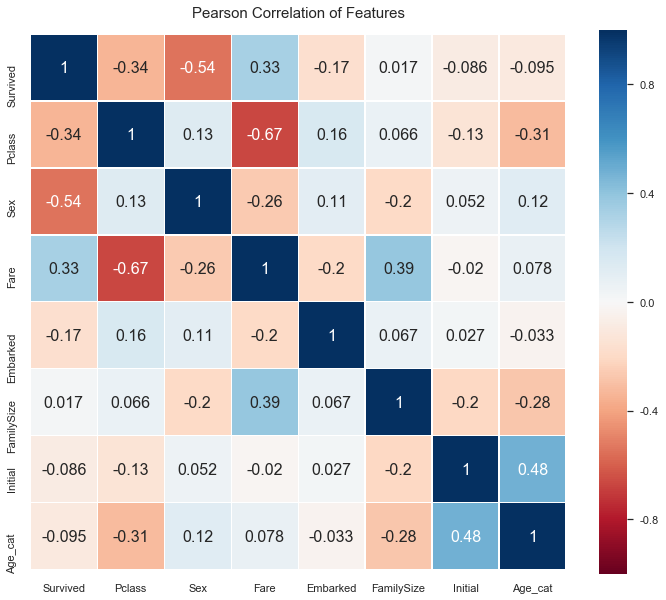

In [55]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
plt.title('Pearson Correlation of Features', y = 1.02, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
            linecolor='white', square=True, cmap=colormap, annot=True,
            annot_kws = {"size" : 16})

del heatmap_data
plt.show()

* 앞선 EDA에서 살펴보았듯이, Sex와 Pclass가 Survived와 연관이 있는 것으로 보이며 Fare 도 상관관계가 있어보입니다.
* Pclass와 Fare는 상식적으로 생각하듯이 어느정도의 상관관계가 있어보입니다. 
* 모델을 학습시킬 때, 상관관계가 서로 너무 큰 변수는 불필요한 redundant feature로 보고 학습에서 제외시키기도 합니다. 

### 3.4 One-hot encoding on Initial and Embarked

* 수치화시킨 카테고리 데이터를 그대로 넣어도 되지만, 모델의 성능을 높이기 위해 one-hot encoding을 해줄 수 있습니다.
* One-hot encoding은 카테고리 feature를 0,1의 값들로 이루어진 다차원의 벡터로 나타내는 것을 말합니다.
* 판다스의 get_dummies를 활용하면 쉽게 one-hot encoding을 할 수 있습니다.
* 해당 컬럼명을 prefix를 두어서 구분이 쉽게 할 수 있습니다.

In [56]:
df_train = pd.get_dummies(df_train, columns = ['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns = ['Initial'], prefix='Initial')

In [57]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,3,0,0,1,0,0


* Embarked에도 동일하게 적용하겠습니다.

In [58]:
df_train = pd.get_dummies(df_train, columns =['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns =['Embarked'], prefix='Embarked')

* sklearn의 LabelEncoder + OneHotEncoder를 이용할 수도 있습니다.
* 가끔씩 카테고리 값의 개수가 100개를 넘어가는 등 많은 경우에는 feature의 수도 그만큼 많이 넘어가 학습이 어려워지는 경우가 있습니다. 이 경우에는 다른 방법을 고민해보아야 합니다.

In [59]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_cat,Age_cat_2,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,...,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,...,3,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,...,2,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,...,3,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,...,3,3,0,0,1,0,0,0,0,1


In [60]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Age', 'Parch', 'Ticket', 'Cabin', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Age', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [62]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


In [63]:
df_train.shape, df_test.shape

((891, 14), (418, 13))

* train과 test셋이 레이블인 Survived를 제외하고 동일한 column을 가진 것을 확인할 수 있습니다.

## 4. Building machine learning model and prediction using the trained model 

이제 준비가 다 되었으니 sklearn을 사용해 본격적으로 머신러닝 모델을 만들어보겠습니다.

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

* sklearn에는 머신러닝의 처음부터 끝까지 모두 있습니다. feature engineering, preprocessing, 지도학습 알고리즘, 비지도학습 알고리즘, 모델평가, 파이프라인 등 머신러닝에 관련된 모든 작업들이 쉬운 인터페이스로 구현되어 있습니다. 
* 타이타닉 문제는 target class과 0과 1로 이루어진 binary classification 문제입니다.
* 지금 가지고 있는 train set의 survived를 제외한 input으로 모델을 최적화시켜서 각 탑승객의 생존 유부를 판단하느 모델을 만들어냅니다.
* 그 후 모델이 학습하지 않았던 test set을 input으로 주어서 test set의 각 샘플의 생존 유무를 예측해보겠습니다.

### 4.1 Preperation - Split dataset into train, valid, test set

* 가장 먼저, 학습에 쓰일 데이터와 target label을 drop을 이용하여 분리합니다. 

In [65]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

* 보통 train, test만 언급되지만, 실제 좋은 모델을 만들기 위해서는 valid set을 따로 만들어 모델 평가를 해봅니다.
* train_test_split을 사용하여 쉽게 train 셋을 분리할 수 있습니다.

In [66]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size = 0.3, random_state = 2019)

* sklearn에서는 많은 알고리즘들이 지원되지만 이번에는 랜덤포레스트 모델을 사용하겠습니다.
* 각 머신러닝 알고리즘에는 여러 파라미터가 있습니다. 랜덤포레스트에도 max_deplth, n_estimators, min_samples_split 등의 파라미터가 존재하며 이것이 어떻게 세팅되냐에 따라 모델의 성능이 달라집니다.

### 4.2 Model generation and prediction

In [67]:
model = RandomForestClassifier(random_state=21)
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

* 이제 모델로 검증셋의 레이블 예측까지 했으니 성능을 살펴보겠습니다.

In [68]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.09% 정확도로 생존을 맞춤


특별한 튜닝없이도 82.09%의 정확도가 나왔습니다.

### 4.3 Feature Importance

* 학습된 모델은 feature importance를 가지는데 이것을 확인해서 지금 만든 모델이 어떤 feature의 영향을 많이 받았는지 확인할 수 있습니다.
* 판다스의 series를 이용하여 sorting 한 뒤 그래프를 그릴 수 있습니다.

In [69]:
feature_importance = model.feature_importances_
Series_feat_imp = pd.Series(feature_importance, index=df_test.columns)

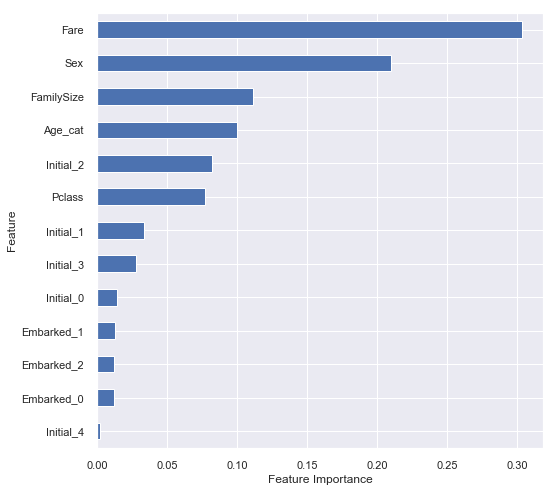

In [70]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

* 우리가 얻은 모델에서는 Fare가 가장 큰 영향력을 가지며 그 뒤로 Sex, FamilySize, Age_cat 등이 차례로 중요도가 높습니다.
* feature importance는 현재 모델에서의 importance로 모델을 변경하면 importance가 다르게 나올 수 있습니다.
* 이 결과로 실제로 Fare가 중요한 feature라고 판단을 내릴 수도 있지만, 이것은 모델에 귀속된 결론이므로 통계적으로 좀 더 살펴보아야 합니다.
* feature_importance를 가지고 좀 더 정확도가 높은 모델을 얻기 위해 feature selection을 할 수도 있고, 좀 더 빠른 모델을 위해 feature 제거를 할 수 있습니다.

### 4.4 Prediction on Test Set

* 이제 모델이 학습하지 않았던 테스트셋을 모델에 주어 생존여부를 예측해보겠습니다. 

In [71]:
submission = pd.read_csv('input/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


* 테스트 셋에 대해 예측하고 결과를 csv파일로 저장하겠습니다.

In [72]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [73]:
submission.to_csv('Titanic Tutorial.csv', index=False)